In [15]:
import numpy as np 
import pandas as pd
import os
import glob
import re
import sys

import plotnine
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation, rc
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString

In [2]:
files = glob.glob('dataset/*.csv')
data = []
for i in files :
    i = re.sub("dataset/", "", i)
    data.append(re.sub(".csv","",i))
for i in range(len(files)) :
    globals()[data[i]] = pd.read_csv(files[i])
data

['TimeAge',
 'SearchTrend',
 'TimeProvince',
 'Weather',
 'PatientRoute',
 'PatientInfo',
 'Region',
 'TimeGender',
 'Case',
 'Time']

In [3]:
korea = gpd.read_file("korea")

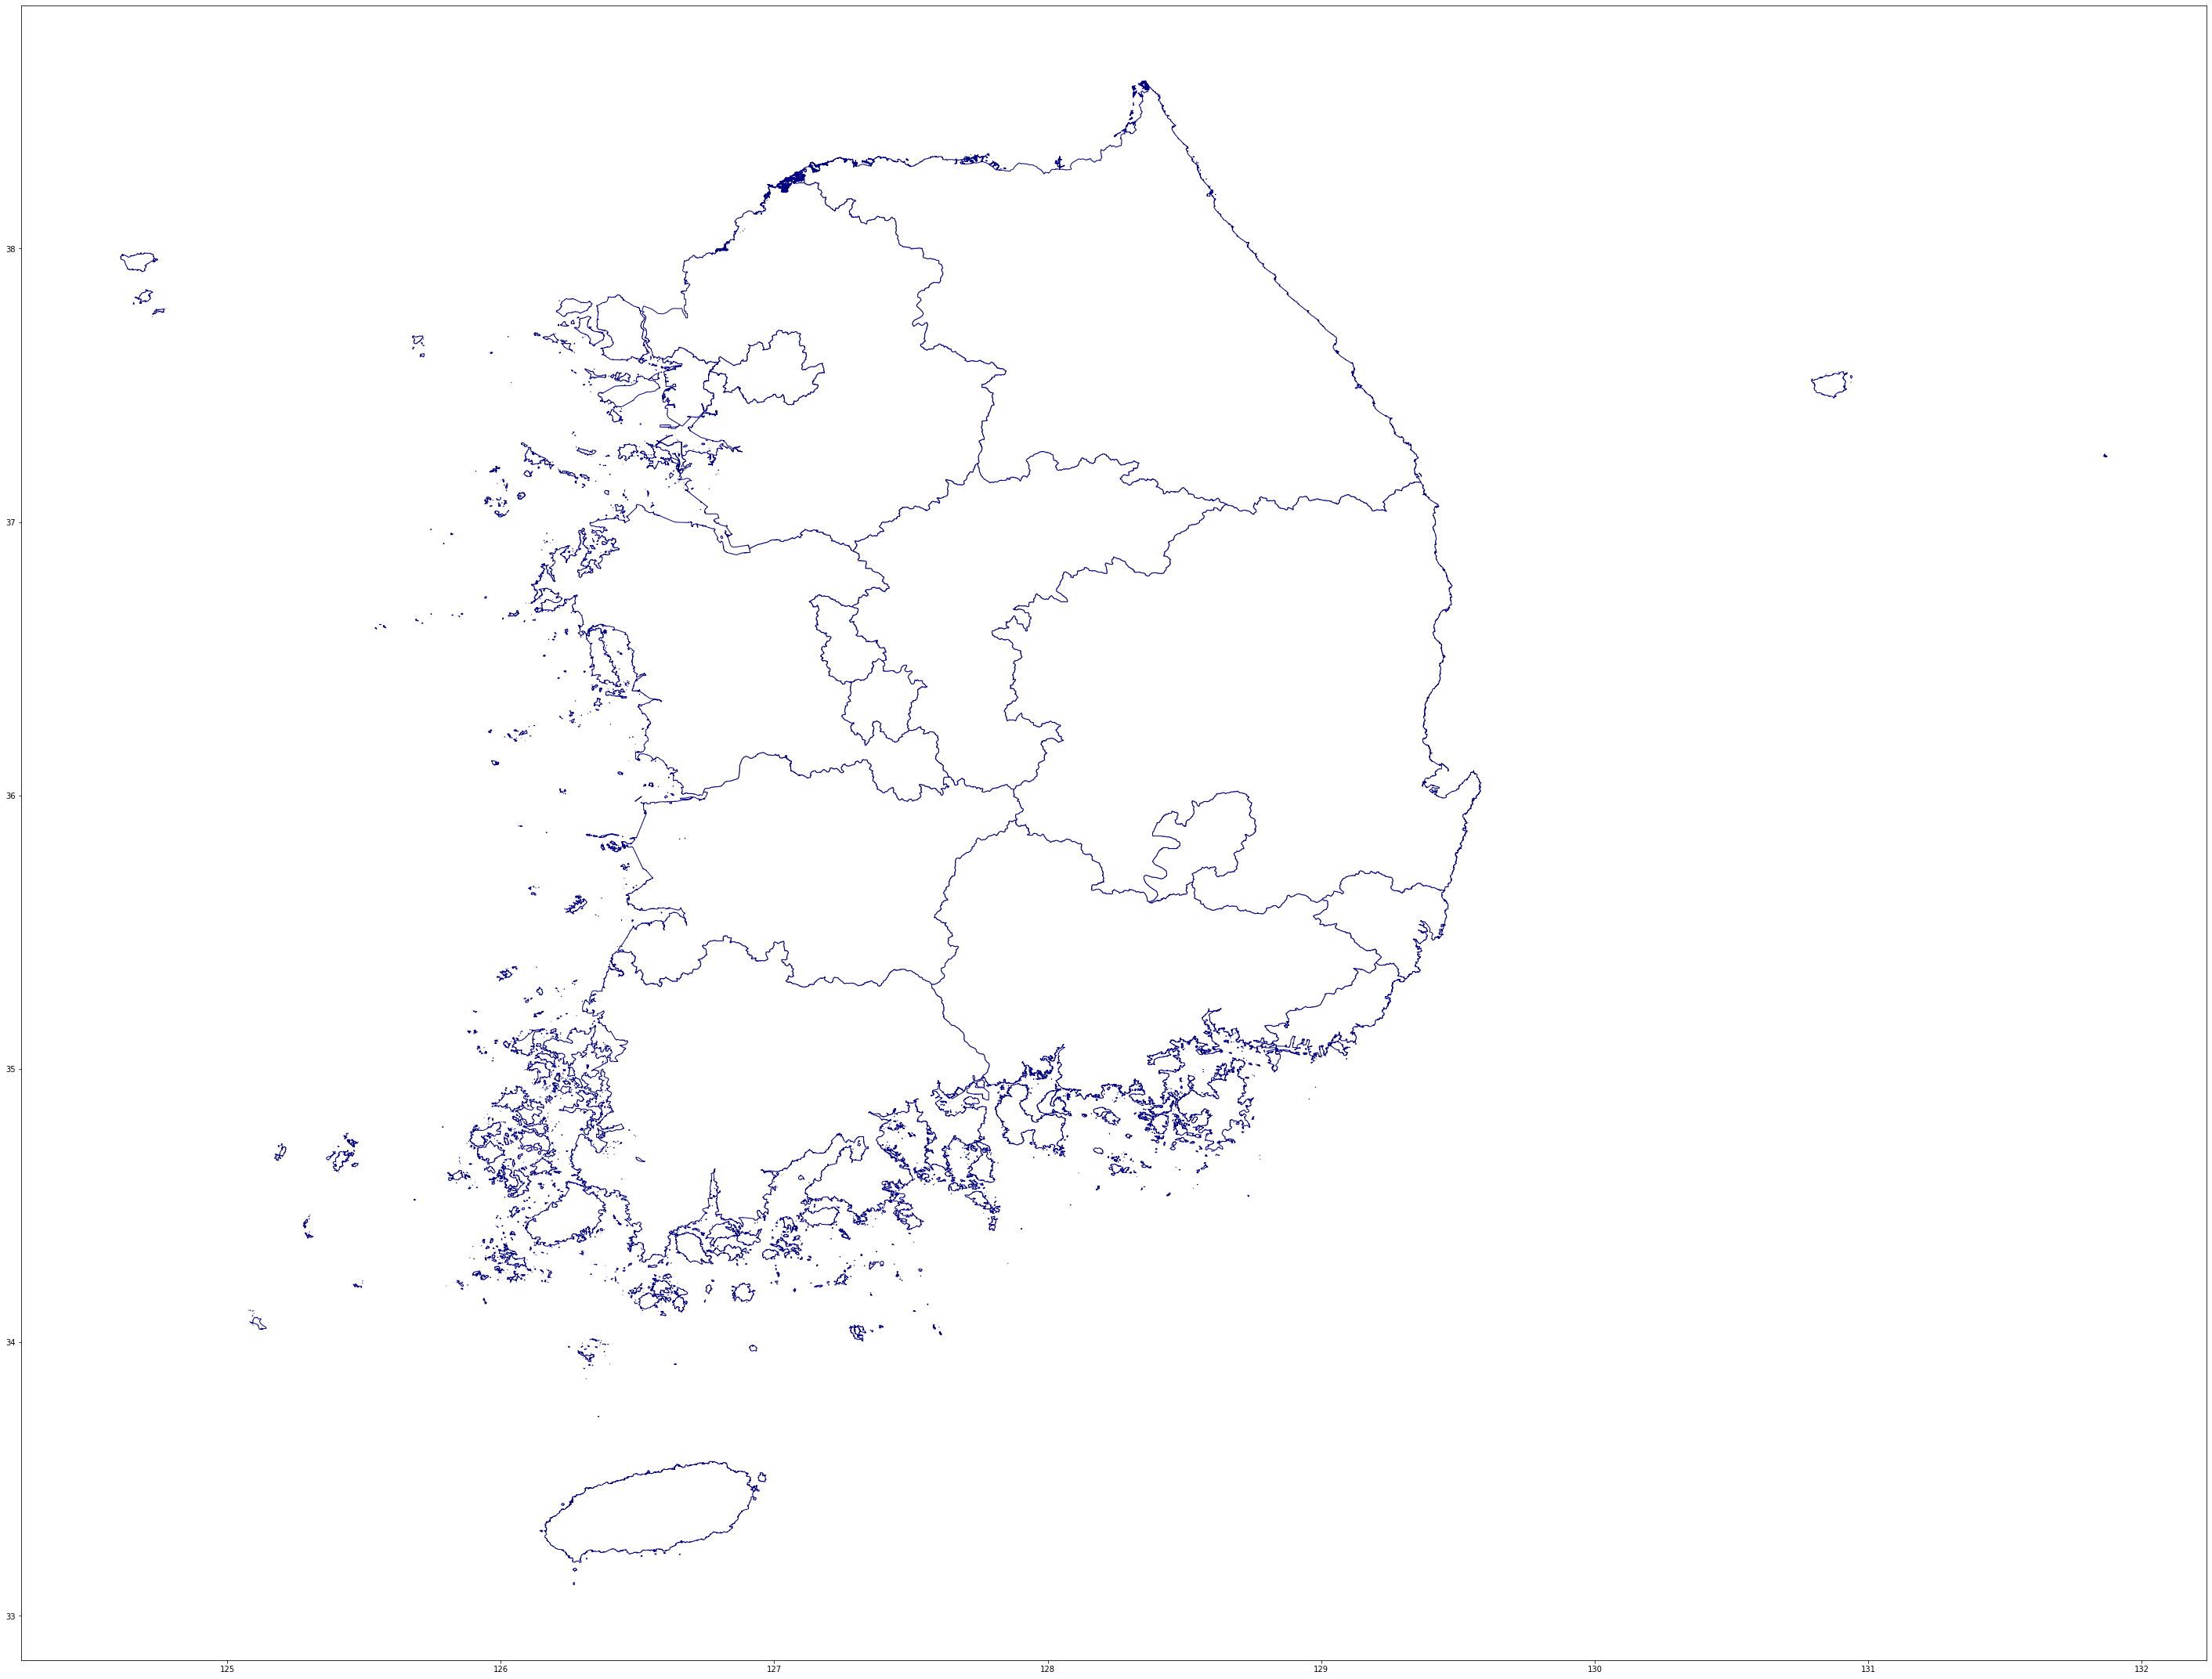

In [9]:
base = korea.plot(color = 'white', edgecolor= 'navy',figsize=(50,40))

In [10]:
route_geo = gpd.GeoDataFrame(PatientRoute,geometry=gpd.points_from_xy(PatientRoute.longitude,PatientRoute.latitude))

In [19]:
route_geo

,patient_id,global_num,date,province,city,latitude,longitude,geometry
0,1400000001,1,2020-01-19,Incheon,Jung-gu,37.460459,126.440680,POINT (126.44068 37.46046)
1,1400000001,1,2020-01-20,Incheon,Seo-gu,37.478832,126.668558,POINT (126.66856 37.47883)
2,1000000001,2,2020-01-22,Gyeonggi-do,Gimpo-si,37.562143,126.801884,POINT (126.80188 37.56214)
3,1000000001,2,2020-01-23,Seoul,Jung-gu,37.567454,127.005627,POINT (127.00563 37.56745)
4,2000000001,3,2020-01-20,Incheon,Jung-gu,37.460459,126.440680,POINT (126.44068 37.46046)
...,...,...,...,...,...,...,...,...
170,1200000031,31,2020-02-09,Daegu,Nam-gu,35.839820,128.566600,POINT (128.56660 35.83982)
171,1200000031,31,2020-02-15,Daegu,Dong-gu,35.882410,128.662100,POINT (128.66210 35.88241)
172,1200000031,31,2020-02-16,Daegu,Nam-gu,35.839820,128.566600,POINT (128.56660 35.83982)
173,1200000031,31,2020-02-17,Daegu,Suseong-gu,35.844730,128.612300,POINT (128.61230 35.84473)


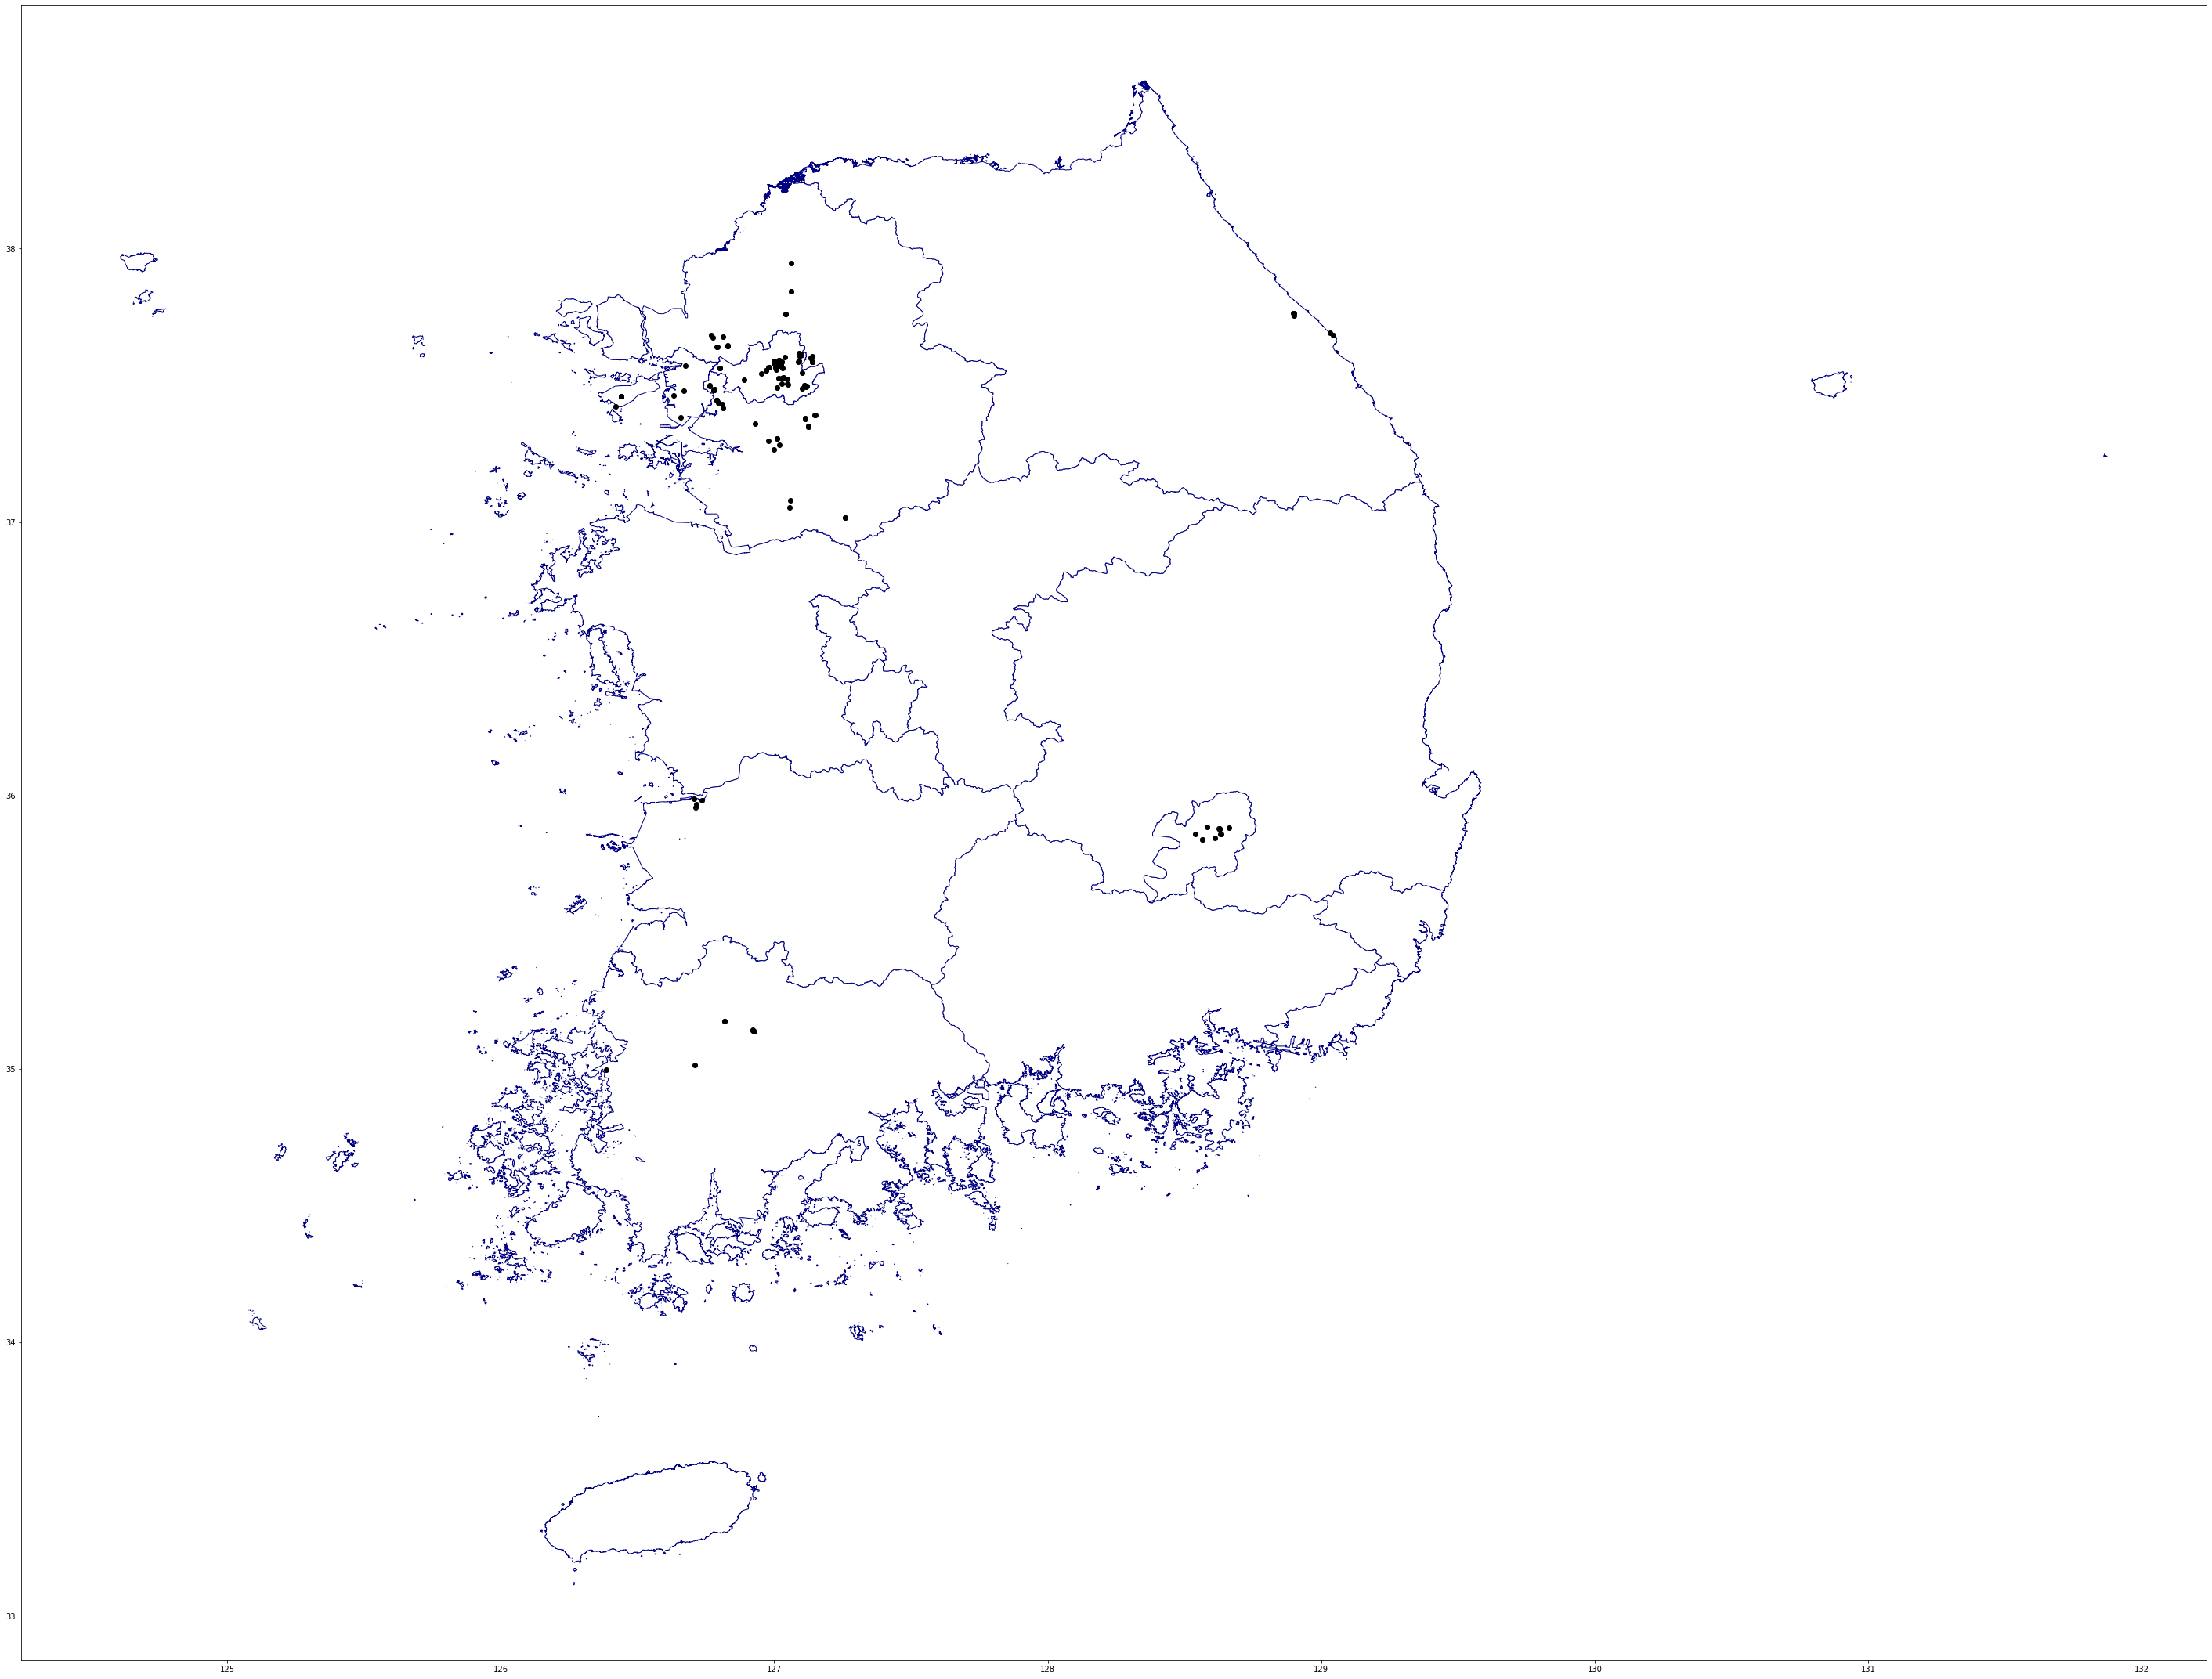

In [26]:
base = korea.plot(color = 'white', edgecolor= 'navy',figsize=(50,40))
route_geo.plot(ax=base,marker='o',color="black")

LineStrings 를 만들어야 함.

In [39]:
patients = list(set(PatientRoute["patient_id"]))

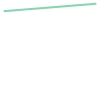

In [43]:
LineString(route_geo[route_geo["patient_id"] == 1400000001].geometry)

In [ ]:
for i in range(len(patients)) :
    LineString(route_geo[route_geo["patient_id"] == patients[i]].geometry)